In [1]:
import tensorflow as tf

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
X = iris.data

In [6]:
y = iris.target

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=100, random_state=1, stratify=y)

In [10]:
model = tf.keras.Sequential() #순서대로 층을 쌓아가겠다.

In [11]:
#은닉충 추가 : 은닉 유닛의 개수, 입력모양, 활성함수
model.add(tf.keras.layers.Dense(16, input_shape = (4,), activation='sigmoid')) # (4,)는 튜플 형식

In [12]:
#출력층 추가 : 출력 유닛의 개수, 활성함수
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [14]:
(4 + 1)*16

80

In [15]:
(16 + 1)*3

51

In [16]:
#모델 컴파일 : 비용(loss), 옵티마이저(optimizer:최적화 알고리즘), 지표(metric)
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train, epochs = 20, batch_size = 2) #random하게 2개 뽑고 고치고를 반복 (batch)

Epoch 1/20
50/50 [==============================] - 0s 834us/step - loss: 1.1986 - accuracy: 0.4600
Epoch 2/20
50/50 [==============================] - 0s 875us/step - loss: 0.9685 - accuracy: 0.6700
Epoch 3/20
50/50 [==============================] - 0s 997us/step - loss: 0.9095 - accuracy: 0.6700
Epoch 4/20
50/50 [==============================] - 0s 794us/step - loss: 0.8717 - accuracy: 0.6900
Epoch 5/20
50/50 [==============================] - 0s 773us/step - loss: 0.8379 - accuracy: 0.7100
Epoch 6/20
50/50 [==============================] - 0s 794us/step - loss: 0.8027 - accuracy: 0.7500
Epoch 7/20
50/50 [==============================] - 0s 1ms/step - loss: 0.7753 - accuracy: 0.7300
Epoch 8/20
50/50 [==============================] - 0s 773us/step - loss: 0.7484 - accuracy: 0.7300
Epoch 9/20
50/50 [==============================] - 0s 997us/step - loss: 0.7195 - accuracy: 0.7300
Epoch 10/20
50/50 [==============================] - 0s 796us/step - loss: 0.6920 - accuracy: 0.7900
E

In [18]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.9200


[0.5307724475860596, 0.9200000166893005]

In [19]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [20]:
X_train.shape #데이터 6만개, 28*28은 픽셀 수

(60000, 28, 28)

In [21]:
X_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [22]:
import matplotlib.pyplot as plt

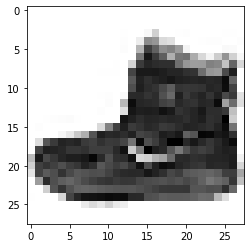

In [23]:
plt.imshow(X_train[0,:,:], cmap='Greys') #im은 이미지

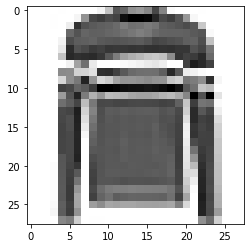

In [24]:
plt.imshow(X_train[5,:,:], cmap='Greys')

In [25]:
y_train[0]

9

In [26]:
y_train[5]

2

#### 시퀀설 API를 사용하여 이미지 분류기 만들기(패션 MNIST)

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [28]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

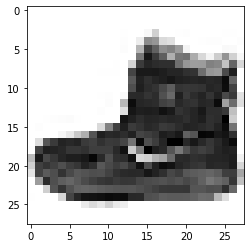

In [29]:
plt.imshow(X_train[0, :, :], cmap='Greys')

In [30]:
class_names = ['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']

In [31]:
X_train = X_train / 255.0 #표준화, 모든 X값이 정수가 아닌 0 ~ 1사이로 들어감  #(0~255) => (0.0 , 1.0)
X_test = X_test / 255.0

In [32]:
#MLP : 입력픙 => 은닉층1(300) => 은닉층2(100) => 출력층(10)
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape=[28,28]), 
                                     tf.keras.layers.Dense(300, activation='relu'), 
                                     tf.keras.layers.Dense(100, activation='relu'), 
                                     tf.keras.layers.Dense(10, activation='softmax')
])

In [33]:
#모형 컴파일 : 비용(손실) 함수, 최적화 알고리즘, 지표를 설정
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)
#epoch를 쓰면서 네트워크를 쓰는양을 정한다.

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.7042 - accuracy: 0.7694 - val_loss: 0.5159 - val_accuracy: 0.8312
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4830 - accuracy: 0.8323 - val_loss: 0.4770 - val_accuracy: 0.8320
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4386 - accuracy: 0.8463 - val_loss: 0.5118 - val_accuracy: 0.8253
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4124 - accuracy: 0.8556 - val_loss: 0.4247 - val_accuracy: 0.8445
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3933 - accuracy: 0.8626 - val_loss: 0.4083 - val_accuracy: 0.8537
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3779 - accuracy: 0.8667 - val_loss: 0.3786 - val_accuracy: 0.8648
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3642 - accuracy: 0.8717 - val_loss: 0.4655 - val_accuracy:

In [35]:
import pandas as pd

<AxesSubplot:>

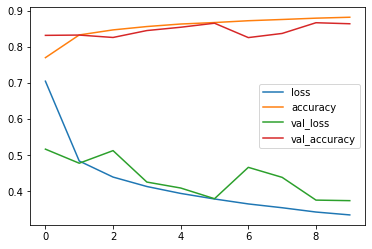

In [36]:
pd.DataFrame(history.history).plot()

In [37]:
model.predict(X_test[:3])

array([[6.79824298e-05, 1.30884755e-05, 3.67707435e-05, 2.31471131e-05,
        3.43240172e-05, 2.19246447e-01, 6.22224543e-05, 1.03114896e-01,
        6.10737782e-03, 6.71293795e-01],
       [4.05733317e-06, 8.93138221e-08, 9.93784308e-01, 1.90016533e-06,
        3.36688757e-03, 1.26249355e-09, 2.84128985e-03, 3.81008142e-11,
        1.45115689e-06, 9.87139370e-10],
       [4.55464287e-05, 9.99852300e-01, 4.10612301e-06, 7.10268287e-05,
        2.55717532e-05, 1.15054606e-08, 7.97549262e-07, 1.11669117e-07,
        4.29235740e-07, 2.30114927e-09]], dtype=float32)

In [38]:
import numpy as np

In [39]:
np.argmax(model.predict(X_test[:3]),axis=1)

array([9, 2, 1], dtype=int64)

In [40]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [41]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3943 - accuracy: 0.8584


[0.3942930996417999, 0.8583999872207642]

In [42]:
p = np.argmax(model.predict(X_test), axis=1)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test,p)

array([[671,   1,  21,  89,   2,   4, 197,   0,  15,   0],
       [  1, 953,   2,  37,   4,   0,   2,   0,   1,   0],
       [  6,   0, 826,  21,  78,   1,  61,   0,   7,   0],
       [  7,   5,  11, 923,  23,   0,  24,   0,   7,   0],
       [  0,   0, 132,  57, 746,   1,  59,   0,   5,   0],
       [  0,   0,   0,   1,   0, 967,   0,  25,   3,   4],
       [ 61,   1, 112,  62,  70,   1, 667,   0,  26,   0],
       [  0,   0,   0,   0,   0,  36,   0, 947,   1,  16],
       [  1,   1,   5,   7,   1,   4,   8,   6, 967,   0],
       [  0,   0,   0,   0,   0,  31,   0,  51,   1, 917]], dtype=int64)